<a id="top"></a>
# Inference and Modeling

## <font color= "INDIANRED">Section 1 - Parameters and Estimates</font>

* [Sampling Model Parameters and Estimates](#1a)
* [The Sample Average](#1b)
* [Polling vs Forecasting](#1c)
* [Properties of Our Estimate](#1d)


## <font color= "INDIANRED">Section 2 - The Central Limit Theorem in Practice</font>

* [The Central Limit Theorem in Practice](#2a)
* [Margin of Error](#2b)
* [A Monte Carlo Simulation for the CLT](#2c)
* [The Spread](#2d)
* [Bias: Why Not Run a Very Large Poll?](#2e)

## <font color= "INDIANRED"> Section 3 - Confidence Intervals and p-Values</font>

* [Confidence Intervals](#3a)
* [A Monte Carlo Simulation for Confidence Intervals](#3b)
* [The Correct Language](#3c)
* [Power](#3d)
* [p_Value](#3e)


## <font color= "INDIANRED">Section 4 - Statistical Models</font>

* [Poll Aggregators](#4a)
* [Pollsters and Multilevel Models](#4b)
* [Poll Data and Pollster Bias](#4c)
* [Data-Driven Models](#4d)


## <font color= "INDIANRED">Section 5 - Bayesian Statistics</font>

* [Bayesian Statistics](#5a)
* [Baye's Theorem](#5b)
* [Bayes in Practice](#5c)
* [The Hiearchical Model](#5d)


## <font color= "INDIANRED">Section 6 - Election Forecasting</font>

* [Election Forecasting](#6a)
* [Mathematical Representations of Models](#6b)
* [Predicting the Electoral College](#6c)
* [Forecasting](#6d)
* [The t-Distribution](#6e)


## <font color= "INDIANRED">Section 7 - Association Tests</font>

* [Association Tests](#7a)
* [Chi-Squared Tests](#7b)



# Section 1
[Top](#top)

<a id="1a"></a>
    
## Sampling Model Parameters and Estimates

In [1]:
library(tidyverse)
library(dslabs)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


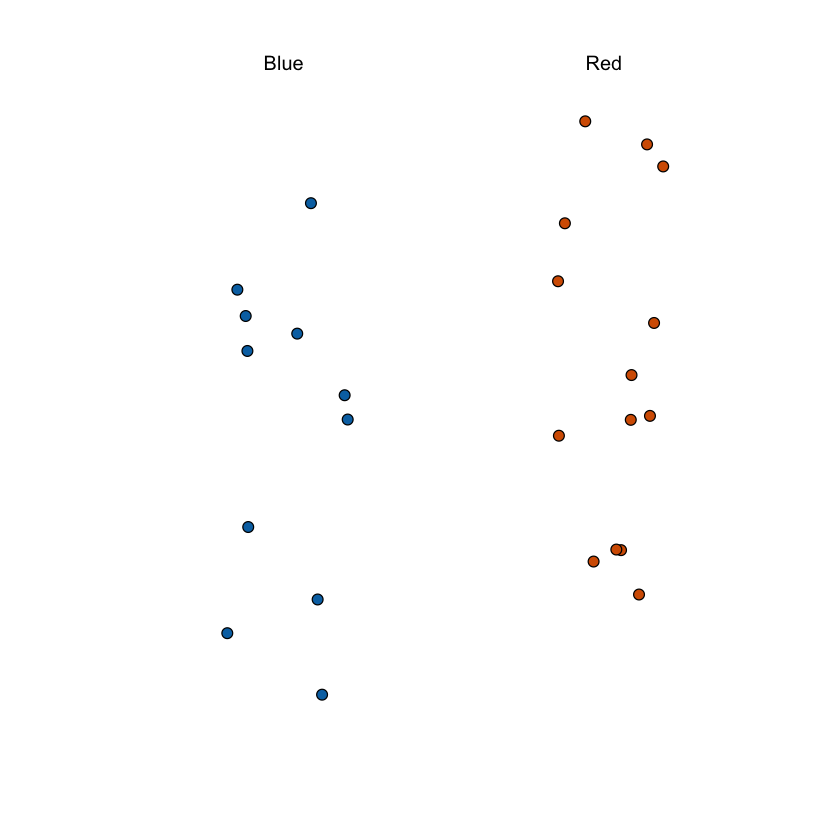

In [5]:
ds_theme_set()
take_poll(25)

We want to predict the proportion of blue beads in the urn. Let’s call this quantity  `p`, which then tells us the proportion of red beads `1 − p`, and the spread `p − (1 − p)`, which simplifies to `2p −1`.

A measure of spread, sometimes also called a measure of dispersion, is used to describe the variability in a sample or population.

In [57]:
dice <- sample(c(1,2,3,4,5,6), 1)

B <- 1000000
outcome <- replicate(B,  sample(c(1,2,3,4,5,6), 1))
mean(outcome == 1)
mean(outcome == 2)
mean(outcome == 3)
mean(outcome == 4)
mean(outcome == 5)
mean(outcome == 6)

[1] 0.166801

[1] 0.166419

[1] 0.166829

[1] 0.166916

[1] 0.16621

[1] 0.166825

In [58]:
coin_flip <- replicate(B, sample(c(1,0), 1))
mean(coin_flip == 1)
mean(coin_flip == 0)

[1] 0.500011

[1] 0.499989

### Spread 

** $p - (1 - p) = 2p-1$**  

### Expected Value of $\bar{X}$
** $E(\bar{X}) = p$ **  

### Expected Standard Error of $\bar{X}$  
** $SE(\bar{X}) = \sqrt{(p(1-p)/N}$ **

## Exercise ##

### Exercise 1. Polling - expected value of S

Suppose you poll a population in which a proportion p of voters are Democrats and 1−p are Republicans. Your sample size is N=25. Consider the random variable S, which is the total number of Democrats in your sample.

What is the expected value of this random variable S ?

A: E(S) = 25p

### Exercise 2. Polling - standard error of S

Again, consider the random variable S, which is the total number of Democrats in your sample of 25 voters. The variable p describes the proportion of Democrats in the sample, whereas 1−p describes the proportion of Republicans.

What is the standard error of S?

A: SE(S) = $\sqrt{25p(1-p)}$

### Exercise 3. Polling - expected value of X-bar

Consider the random variable S/N, which is equivalent to the sample average that we have been denoting as $\bar{X}$. The variable N
represents the sample size and p is the proportion of Democrats in the population.

What is the expected value of $\bar{X}$?  

A: E($\bar{X}$) = p

### Exercise 4. Polling - standard error of X-bar

What is the standard error of the sample average, $\bar{X}$?
The variable N represents the sample size and p is the proportion of Democrats in the population.

A: SE($\bar{X}$) = $\sqrt{p(1-p)/N}$

### Exercise 5. se versus p

Write a line of code that calculates the standard error `se` of a sample average when you poll 25 people in the population. Generate a sequence of 100 proportions of Democrats `p` that vary from 0 (no Democrats) to 1 (all Democrats).

Plot `se` versus `p` for the 100 different proportions.

* Use the `seq` function to generate a vector of 100 values of `p` that range from 0 to 1.
* Use the `sqrt` function to generate a vector of standard errors for all values of `p`.
* Use the `plot` function to generate a plot with `p` on the x-axis and `se` on the y-axis.

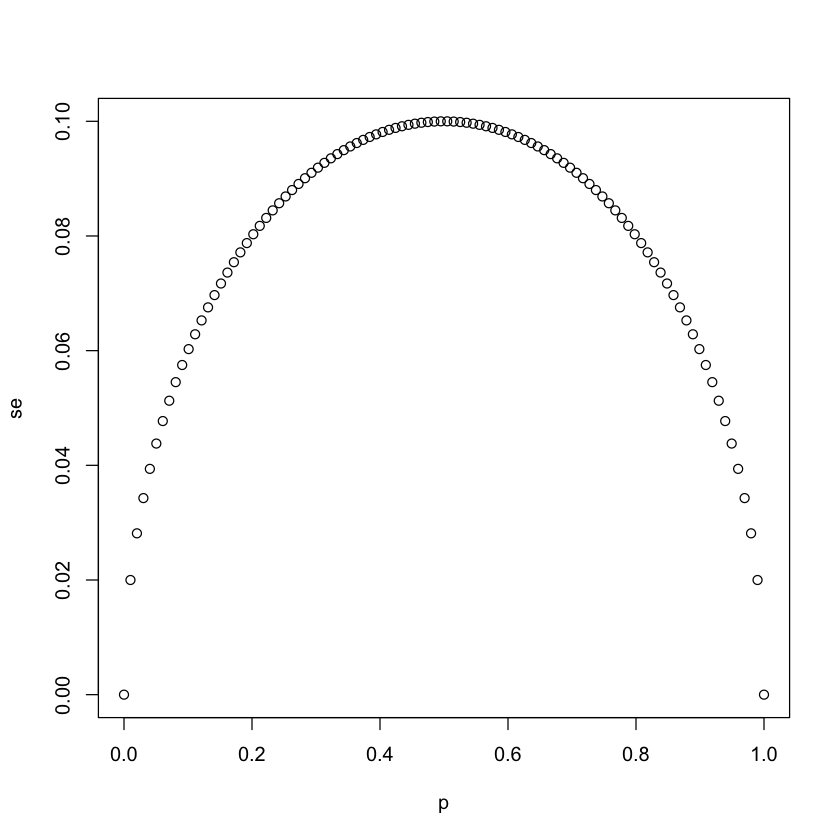

In [88]:
# `N` represents the number of people polled
N <- 25

# Create a variable `p` that contains 100 proportions ranging from 0 to 1 using the `seq` function
p <- seq(0,1, length.out = 100)

# Create a variable `se` that contains the standard error of each sample average
se <- sqrt((p*(1-p))/N)

# Plot `p` on the x-axis and `se` on the y-axis
plot(x = p, y = se)

### Exercise 6. Multiple plots of se versus p

Using the same code as in the previous exercise, create a for-loop that generates three plots of `p` versus `se` when the sample sizes equal N=25, N=100, and N=1000.

* You our for-loop should contain two lines of code to be repeated for three different values of N.
* The first line within the for-loop should use the `sqrt` function to generate a vector of standard errors `se` for all values of `p`.
* The second line within the for-loop should use the `plot` function to generate a plot with `p` on the x-axis and `se` on the y-axis.
* Use the `ylim` argument to keep the y-axis limits constant across all three plots. The lower limit should be equal to 0 and the upper limit should equal the highest calculated standard error across all values of `p` and `N`.

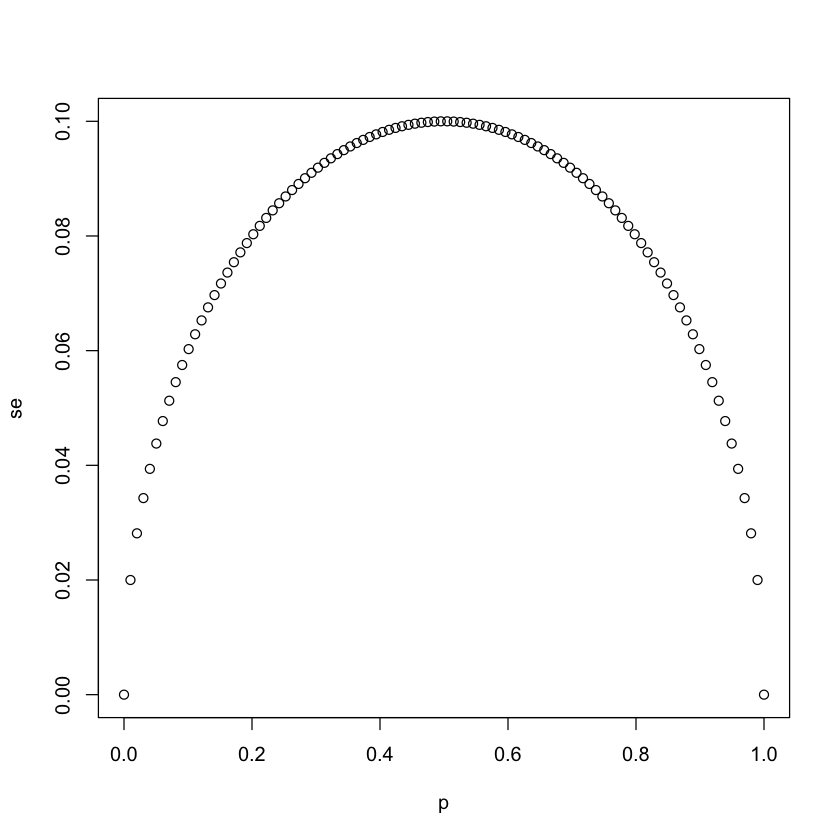

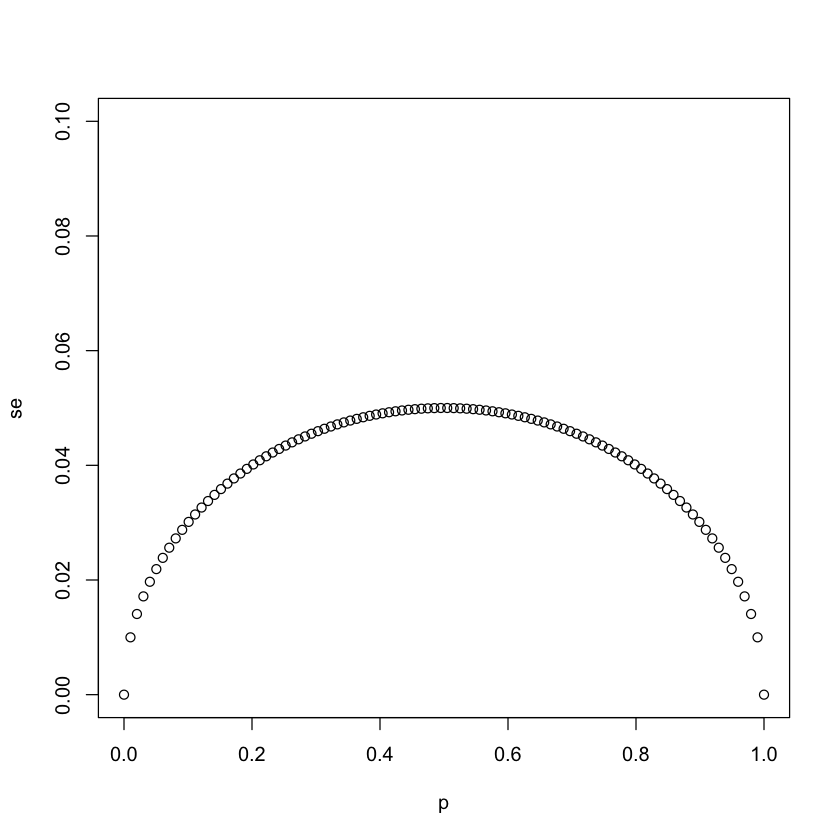

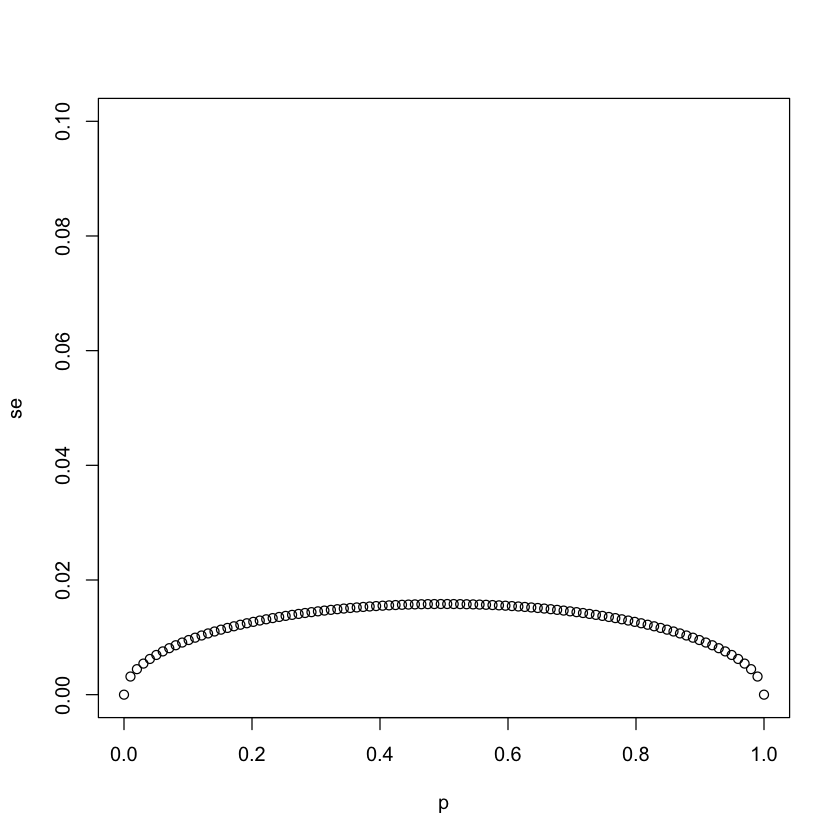

In [102]:
# The vector `p` contains 100 proportions of Democrats ranging from 0 to 1 using the `seq` function
p <- seq(0, 1, length = 100)

# The vector `sample_sizes` contains the three sample sizes
sample_sizes <- c(25, 100, 1000)

# Write a for-loop that calculates the standard error `se` for every value of `p` for each of the three samples sizes `N` in the vector `sample_sizes`. Plot the three graphs, using the `ylim` argument to standardize the y-axis across all three plots.
m <-0
for (N in sample_sizes) {
   a <- sqrt(p*(1-p))/sqrt(N) 
   if ( max(a) > m) {
       m <- max(a)
   }
}


for (N in sample_sizes) {
   se <- sqrt(p*(1-p))/sqrt(N)
   plot(p, se, ylim = c(0, m))
}



### Exercise 7. Expected value of d

Our estimate for the difference in proportions of Democrats and Republicans is d= $\bar{X}−(1−\bar{X})$

Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the expected value of d ?

A: $E[\bar{X}-(1-\bar{X})] = E[2\bar{X}-1] = 2E[\bar{X}]-1 = 2p - 1 = p - (1-p)$

### Exercise 8. Standard error of d

Our estimate for the difference in proportions of Democrats and Republicans is d=$\bar{X}−(1−\bar{X})$.

Which derivation correctly uses the rules we learned about sums of random variables and scaled random variables to derive the standard error of d?

Note: substracting by 1 does not affect the standard error

A: $SE[\bar{X}-(1-\bar{X})] = SE[2\bar{X}-1] = 2SE[\bar{X}]= 2\sqrt{p(1-p}/N$

### Exercise 9. Standard error of the spread

Say the actual proportion of Democratic voters is p=0.45. In this case, the Republican party is winning by a relatively large margin of d=−0.1, or a 10% margin of victory. What is the standard error of the spread 2$\bar{X}$−1 in this case?

* Use the sqrt function to calculate the standard error of the spread 2$\bar{X}$−1.

In [104]:
# `N` represents the number of people polled
N <- 25

# `p` represents the proportion of Democratic voters
p <- 0.45

# Calculate the standard error of the spread. Print this value to the console.

2*sqrt(p*(1-p)/N)


[1] 0.1989975

### Exercise 10. Sample size

So far we have said that the difference between the proportion of Democratic voters and Republican voters is about 10% and that the standard error of this spread is about 0.2 when N=25. Select the statement that explains why this sample size is sufficient or not.

A: This sample size is too small because the standard error is larger than the spread.

spread = 0.1
standard error = 0.2

<a id="2a"></a>
    
## Central Limit Theorem in Practice

In [116]:
urn <- sample(x = c(1,0), size = 52, replace = TRUE)
urn

[1] 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0
[39] 1 0 0 0 0 1 0 1 1 0 1 0 0 0

In [ ]:
h h h h
h t t t
t h t t
t t h t
t t t h
h h t t
t h h t
t t h h
t h t h
h t h t
h t t h
h h h t
t h h h
h t h h
h h t h
t t t t 


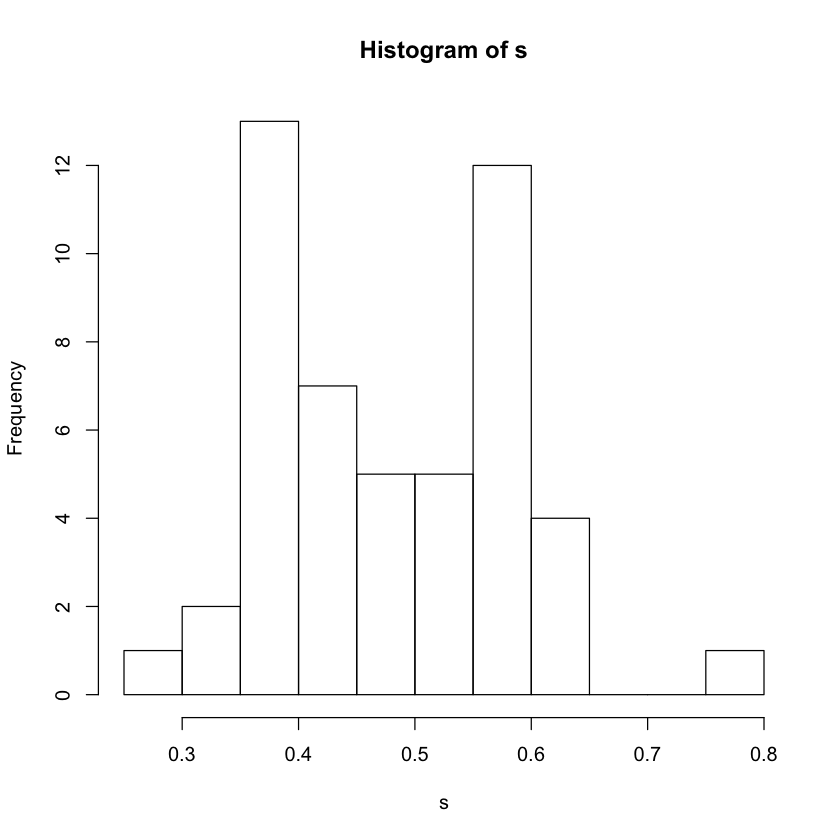

In [134]:
B <- 50
#s <- sample(x = urn, size = 25, replace = TRUE)
s  <- replicate(n = B, {
    a <- sample(x = urn, size = 25, replace = TRUE)
    mean(a)
    
})

hist(s)

### Exercise 1. Sample average

Write function called take_sample that takes the proportion of Democrats p and the sample size N as arguments and returns the sample average of Democrats (1) and Republicans (0).

Calculate the sample average if the proportion of Democrats equals 0.45 and the sample size is 100.

* Define a function called `take_sample` that takes p and N as arguments.
* Use the `sample` function as the first statement in your function to sample N elements from a vector of options where Democrats are assigned the value '1' and Republicans are assigned the value '0'.
* Use the `mean`function as the second statement in your function to find the average value of the random sample.

In [1]:
# Write a function called `take_sample` that takes `p` and `N` as arguements and returns the average value of a randomly sampled population.

take_sample <- function(p, N) {
   s <- sample(c(0,1), size = N, replace = TRUE, prob = c(1-p, p))
   mean(s)
}

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Call the `take_sample` function to determine the sample average of `N` randomly selected people from a population containing a proportion of Democrats equal to `p`. Print this value to the console.

take_sample(p, N)

[1] 0.46

### Exercise 2. Distribution of errors - 1

Assume the proportion of Democrats in the population $p$ equals 0.45 and that your sample size $N$ is 100 polled voters. The `take_sample` function you defined previously generates our estimate, $\bar{X}$.

Replicate the random sampling 10,000 times and calculate $p−\bar{X}$ for each random sample. Save these differences as a vector called `errors`. Find the average of `errors` and plot a histogram of the distribution.

* The function `take_sample` that you defined in the previous exercise has already been run for you.
* Use the replicate function to replicate subtracting the result of take_sample from the value of $p$ 10,000 times.
* Use the mean function to calculate the average of the differences between the sample average and actual value of $p$.


In [2]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Create an objected called `errors` that replicates subtracting the result of the `take_sample` function from `p` for `B` replications

errors <- replicate(B, {
  p - take_sample(p, N)
})

# Calculate the mean of the errors. Print this value to the console.

mean(errors)

[1] -4.9e-05

### Exercise 3. Distribution of errors - 2

In the last exercise, you made a vector of differences between the actual value for $p$ and an estimate, $\bar{X}$. We called these differences between the actual and estimated values `errors`.

The `errors` object has already been loaded for you. Use the `hist` function to plot a histogram of the values contained in the vector `errors`. Which statement best describes the distribution of the errors?

A: The errors are symmetrically distributed around 0.

### Exercise 4. Average size of error

The error $p−\bar{X}$ is a random variable. In practice, the error is not observed because we do not know the actual proportion of Democratic voters, $p$. However, we can describe the size of the error by constructing a simulation.

What is the average size of the error if we define the size by taking the absolute value ∣$p−\bar{X}$∣?  


* Use the sample code to generate `errors`, a vector of ∣$p−\bar{X}$∣.
* Calculate the absolute value of `errors` using the `abs` function.
* Calculate the average of these values using the `mean` function.


In [3]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the mean of the absolute value of each simulated error. Print this value to the console.

mean(abs(errors))

[1] 0.039267

### Exercise 5. Standard deviation of the spread

The standard error is related to the typical size of the error we make when predicting. We say size because, as we just saw, the errors are centered around 0. In that sense, the typical error is 0. For mathematical reasons related to the central limit theorem, we actually use the standard deviation of `errors` rather than the average of the absolute values.

As we have discussed, the standard error is the square root of the average squared distance $(\bar{X}−p)^2$. The standard deviation is defined as the square root of the distance squared.

Calculate the standard deviation of the spread.

* Use the sample code to generate errors, a vector of $∣p−\bar{X}∣$.
* Use `^2` to square the distances.
* Calculate the average squared distance using the `mean` function.
* Calculate the square root of these values using the `sqrt` function.

In [4]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# We generated `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Calculate the standard deviation of `errors`

sqrt(mean(errors^2))

[1] 0.04949939

### Exercise 6. Estimating the standard error

The theory we just learned tells us what this standard deviation is going to be because it is the standard error of $\bar{X}$.

Estimate the standard error given an expected value of 0.45 and a sample size of 100.

* Calculate the standard error using the `sqrt` function

In [6]:
# Define `p` as the expected value equal to 0.45
p <- 0.45

# Define `N` as the sample size
N <- 100

# Calculate the standard error

sqrt(p*(1-p)/N)

[1] 0.04974937

### Exercise 7. Standard error of the estimate

In practice, we don't know $p$, so we construct an estimate of the theoretical prediction based by plugging in$\bar{X} for p. Calculate the standard error of the estimate:  

<center> $\hat{SE}(\bar{X})$ </center>


* Simulate a poll `X` using the `sample` function.
* When using the `sample` function, create a vector using `c()` that contains all possible polling options where '1' indicates a Democratic voter and '0' indicates a Republican voter.
* When using the `sample` function, use `replace = TRUE` within the `sample` function to indicate that sampling from the vector should occur with replacement.
* When using the `sample` function, use `prob =` within the `sample` function to indicate the probabilities of selecting either element (0 or 1) within the vector of possibilities.
* Use the `mean` function to calculate the average of the simulated poll, `X_bar`.
* Calculate the standard error of the `X_bar` using the `sqrt` function and print the result.

In [7]:
# Define `p` as a proportion of Democratic voters to simulate
p <- 0.45

# Define `N` as the sample size
N <- 100

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `X` as a random sample of `N` voters with a probability of picking a Democrat ('1') equal to `p`

X <- sample(c(1,0), size = N, replace = TRUE, prob = c(p, 1-p))

# Define `X_bar` as the average sampled proportion

X_bar <- mean(X)

# Calculate the standard error of the estimate. Print the result to the console.

sqrt(X_bar * (1-X_bar)/N )

[1] 0.04983974

### Exercise 8. Plotting the standard error

The standard error estimates obtained from the Monte Carlo simulation, the theoretical prediction, and the estimate of the theoretical prediction are all very close, which tells us that the theory is working. This gives us a practical approach to knowing the typical error we will make if we predict $p$ with $\hat{X}$. The theoretical result gives us an idea of how large a sample size is required to obtain the precision we need. Earlier we learned that the largest standard errors occur for $p=0.5$.

Create a plot of the largest standard error for $N$ ranging from 100 to 5,000. Based on this plot, how large does the sample size have to be to have a standard error of about 1%?

```R
N <- seq(100, 5000, len = 100)
p <- 0.5
se <- sqrt(p*(1-p)/N)
```


A: 2,500

### Exercise 9. Distribution of X-hat

For $N=100$, the central limit theorem tells us that the distribution of $\hat{X}$ is...

A: approximately normnal with expected value $p$ and standard error $\sqrt{p(1-p)/N}$

### Exercise 10. Distribution of the errors

We calculated a vector `errors` that contained, for each simulated sample, the difference between the actual value $p$ and our estimate $\bar{X}$.

The errors $\bar{X}−p$ are: 

A: approximately normal with expected valuem 0 and standard error $\sqrt{p(1-p)/N}$

### Exercise 11. Plotting the errors

Make a qq-plot of the errors you generated previously to see if they follow a normal distribution.


* Run the supplied code
* Use the `qqnorm` function to produce a qq-plot of the errors.
* Use the `qqline` function to plot a line showing a normal distribution.

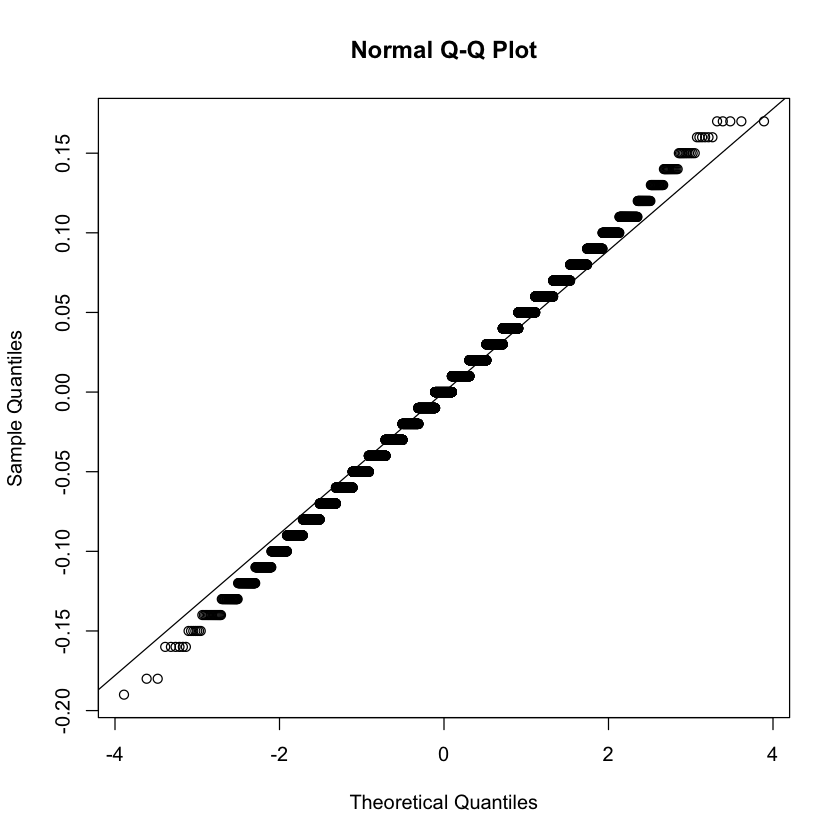

In [8]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# The variable `B` specifies the number of times we want the sample to be replicated
B <- 10000

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Generate `errors` by subtracting the estimate from the actual proportion of Democratic voters
errors <- replicate(B, p - take_sample(p, N))

# Generate a qq-plot of `errors` with a qq-line showing a normal distribution

qqnorm(errors)
qqline(errors)

### Exercise 12. Estimating the probability of a specific value of X-bar

If $p=0.45$ and $N=100$ , use the central limit theorem to estimate the probability that $\bar{X}>0.5$ . 

* Use `pnorm` to define the probability that a value will be greater than 0.5.

In [9]:
# Define `p` as the proportion of Democrats in the population being polled
p <- 0.45

# Define `N` as the number of people polled
N <- 100

# Calculate the probability that the estimated proportion of Democrats in the population is greater than 0.5. Print this value to the console.

se<-sqrt((p*(1-p)/N))

1-pnorm(0.5, mean = p, sd = se)


[1] 0.1574393

### Exercise 13. Estimating the probability of a specific error size

Assume you are in a practical situation and you don't know $p$. Take a sample of size $N=100$ and obtain a sample average of $\bar{X}=0.51$.

What is the CLT approximation for the probability that your error is equal or larger than 0.01?

* Calculate the standard error of the sample average using the `sqrt` function.
* Use `pnorm` twice to define the probabilities that a value will be less than 0.01 or -0.01.
* Calculate the probability that the error will be 0.01 or larger.

In [10]:
# Define `N` as the number of people polled
N <-100

# Define `X_hat` as the sample average
X_hat <- 0.51

# Define `se_hat` as the standard error of the sample average
se_hat <- sqrt(X_hat * (1-X_hat)/N)

# Calculate the probability that the error is 0.01 or larger

1-(pnorm(0.01, 0, se_hat)- pnorm(-0.01, 0, se_hat))

[1] 0.8414493

## Confidence Intervals

In [1]:
#install.packages('devtools')
library(ggplot2)
library(dplyr)
library(tidyverse)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  1.4.2     ✔ purrr   0.2.4
✔ tidyr   0.8.1     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`geom_smooth()` using method = 'loess'


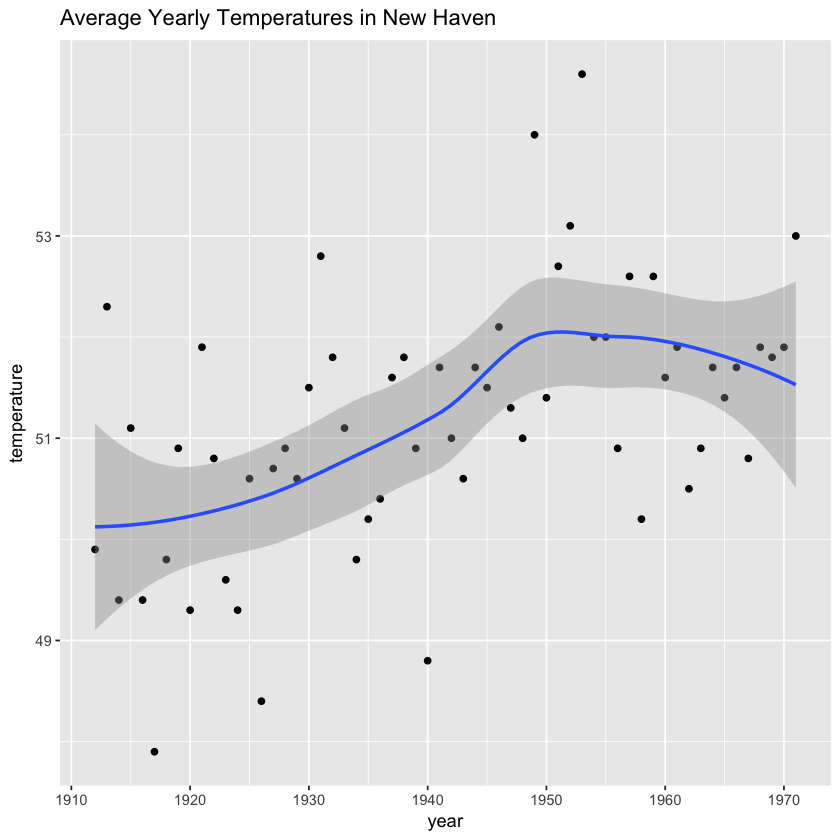

In [2]:
library(ggplot2)
library(dplyr)

data("nhtemp")

d <- data.frame(year = as.numeric(time(nhtemp)), temperature=as.numeric(nhtemp)) 

ggplot(data = d, aes(year, temperature)) + 
  geom_point() + 
  geom_smooth() + 
  ggtitle("Average Yearly Temperatures in New Haven")

In [3]:
qnorm(0.975)

[1] 1.959964

In [4]:
pnorm(1)
qnorm(0.841344746068543)

[1] 0.8413447

[1] 1

In [5]:
pnorm(2)

[1] 0.9772499

In [6]:
qnorm(0.977249868051821)
qnorm(pnorm(1))
pnorm(qnorm(0.841344746068543))

[1] 2

[1] 1

[1] 0.8413447

In [7]:
pnorm(2) - pnorm(-2)

[1] 0.9544997

In [8]:
qnorm(0.995)
pnorm(qnorm(0.995)) - pnorm(qnorm(1-0.995))

[1] 2.575829

[1] 0.99

## Exercises

### Exercise 1. Confidence interval for p

For the following exercises, we will use actual poll data from the 2016 election. The exercises will contain pre-loaded data from the `dslabs` package.

```R
library(dslabs)
data("polls_us_election_2016")
```
We will use all the national polls that ended within a few weeks before the election.

Assume there are only two candidates and construct a 95% confidence interval for the election night proportion p.

* Use `filter` to subset the data set for the poll data you want. Include polls that ended on or after October 31, 2016 (`enddate`). Only include polls that took place in the United States. Call this filtered object `polls`.
* Use `nrows` to make sure you created a filtered object `polls` that contains the correct number of rows.
* Extract the sample size `N` from the first poll in your subset object `polls`.
 Convert the percentage of Clinton voters (`rawpoll_clinton`) from the first poll in `polls` to a proportion, `X_hat`. Print this value to the console.
* Find the standard error of `X_hat` given `N`. Print this result to the console.
* Calculate the 95% confidence interval of this estimate using the `qnorm` function.
* Save the lower and upper confidence intervals as an object called `ci`. Save the lower confidence interval first.

In [2]:
library(dslabs)
data('polls_us_election_2016')

head(polls_us_election_2016)

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [10]:
# Load the data
data(polls_us_election_2016)

# Generate an object `polls` that contains data filtered for polls that ended on or after October 31, 2016 in the United States

polls <- filter(polls_us_election_2016, enddate >= '2016-10-31' & state == 'U.S.')

# How many rows does `polls` contain? Print this value to the console.

nrow(polls)

# Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.

N <- polls$samplesize[1]
N

# For the first poll in `polls`, assign the estimated percentage of Clinton voters to a variable called `X_hat`. Print this value to the console.

X_hat <- polls$rawpoll_clinton[1]/100
X_hat

# Calculate the standard error of `X_hat` and save it to a variable called `se_hat`. Print this value to the console.

se_hat <- sqrt(X_hat*(1-X_hat)/N)
se_hat

# Use `qnorm` to calculate the 95% confidence interval for the proportion of Clinton voters. Save the lower and then the upper confidence interval to a variable called `ci`.

ci <- c(X_hat - qnorm(0.975)*se_hat, X_hat + qnorm(0.975)*se_hat)
ci



[1] 70

[1] 2220

[1] 0.47

[1] 0.01059279

[1] 0.4492385 0.4907615

### Exercise 2. Pollster results for p

Create a new object called `pollster_results` that contains the pollster's name, the end date of the poll, the proportion of voters who declared a vote for Clinton, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

* Use the `mutate` function to define four new columns: `X_hat`, `se_hat`, `lower`, and `upper`. Temporarily add these columns to the `polls` object that has already been loaded for you.
* In the `X_hat` column, convert the raw poll results for Clinton to a proportion.
* In the `se_hat` column, calculate the standard error of `X_hat` for each poll using the `sqrt` function.
* In the `lower` column, calculate the lower bound of the 95% confidence interval using the `qnorm` function.
* In the `upper` column, calculate the upper bound of the 95% confidence interval using the `qnorm` function.
* Use the `select` function to select the columns from `polls` to save to the new object `pollster_results`.

In [11]:
# The `polls` object that filtered all the data by date and nation has already been loaded. Examine it using the `head` function.
head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, X_hat, lower confidence interval, and upper confidence interval for each poll.

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA


In [12]:
# The `polls` object that filtered all the data by date and nation has already been loaded. Examine it using the `head` function.
#head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, X_hat, lower confidence interval, and upper confidence interval for each poll.

polls <- mutate(polls, X_hat = rawpoll_clinton/100, se_hat = sqrt(X_hat*(1-X_hat)/samplesize), lower=X_hat - qnorm(0.975)*se_hat, upper=X_hat + qnorm(0.975)*se_hat)

pollster_results <- select(polls, pollster, enddate, X_hat, se_hat, lower, upper)

head(pollster_results)

pollster,enddate,X_hat,se_hat,lower,upper
ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


### Exercise 3. Comparing to actual results - p

The final tally for the popular vote was Clinton 48.2% and Trump 46.1%. Add a column called `hit` to `pollster_results` that states if the confidence interval included the true proportion p=0.482 or not. What proportion of confidence intervals included p ?

* Use the `mutate` function to define a new variable called 'hit'.
* Use logical expressions to determine if each values in `lower` and `upper` span the actual proportion.
* Use the `mean` function to determine the average value in `hit` and summarize the results using `summarize`.
* Save the result as an object called `avg_hit`.

In [13]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.

pollster,enddate,X_hat,se_hat,lower,upper
ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


In [14]:
pollster_results <- mutate(pollster_results, hit = lower <= 0.482 & upper >= 0.482)

mean(pollster_results$hit)


[1] 0.3142857

In [15]:
avg_hit <- summarize(pollster_results, avg_hit = mean(pollster_results$hit))
avg_hit

avg_hit
0.3142857


### Exercise 4. Theory of confidence intervals

If these confidence intervals are constructed correctly, and the theory holds up, what proportion of confidence intervals should include p ?

A: 0.95

### Exercise 5. Confidence interval for d

A much smaller proportion of the polls than expected produce confidence intervals containing p. Notice that most polls that fail to include p are underestimating. The rationale for this is that undecided voters historically divide evenly between the two main candidates on election day.

In this case, it is more informative to estimate the spread or the difference between the proportion of two candidates d, or 0.482−0.461=0.021 for this election.

Assume that there are only two parties and that d=2p−1. Construct a 95% confidence interval for difference in proportions on election night.

* Use the `mutate` function to define a new variable called 'd_hat' in `polls`. The new variable subtract the proportion of Trump voters from the proportion of Clinton voters.
* Extract the sample size `N` from the first poll in your subset object `polls`.
* Extract the difference in proportions of voters `d_hat` from the first poll in your subset object `polls`.
* Use the formula above to calculate p from `d_hat`. Assign p to the variable `X_hat`.
* Find the standard error of the spread given `N`.
* Calculate the 95% confidence interval of this estimate of the difference in proportions, `d_hat`, using the `qnorm` function.
* Save the lower and upper confidence intervals as an object called `ci`. Save the lower confidence interval first.

In [16]:
# Add a statement to this line of code that will add a new column named `d_hat` to `polls`. The new column should contain the difference in the proportion of voters.
polls <- polls_us_election_2016 %>% 
    filter(enddate >= "2016-10-31" & state == "U.S.") %>% 
    mutate(d_hat = rawpoll_clinton/100 - rawpoll_trump/100)



# Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.
N <- polls$samplesize[1]

# For the difference `d_hat` of the first poll in `polls` to a variable called `d_hat`. Print this value to the console.

d_hat <- polls$d_hat[1]
d_hat

# Assign proportion of votes for Clinton to the variable `X_hat`.
X_hat <- (d_hat + 1)/2

# Calculate the standard error of the spread and save it to a variable called `se_hat`. Print this value to the console.
se_hat <- 2*sqrt(X_hat*(1-X_hat)/N)
se_hat


# Use `qnorm` to calculate the 95% confidence interval for the difference in the proportions of voters. Save the lower and then the upper confidence interval to a variable called `ci`.
 
ci <- c(d_hat - (qnorm(0.975)*se_hat), d_hat + (qnorm(0.975)*se_hat))
ci

[1] 0.04

[1] 0.02120683

[1] -0.001564627  0.081564627

In [17]:
names(polls_us_election_2016)

[1] "state"            "startdate"        "enddate"          "pollster"        
 [5] "grade"            "samplesize"       "population"       "rawpoll_clinton" 
 [9] "rawpoll_trump"    "rawpoll_johnson"  "rawpoll_mcmullin" "adjpoll_clinton" 
[13] "adjpoll_trump"    "adjpoll_johnson"  "adjpoll_mcmullin"

### Exercise 6. Pollster results for d

Create a new object called `pollster_results` that contains the pollster's name, the end date of the poll, the difference in the proportion of voters who declared a vote either, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

* Use the `mutate` function to define four new columns: 'X_hat', 'se_hat', 'lower', and 'upper'. Temporarily add these columns to the `polls` object that has already been loaded for you.
* In the `X_hat` column, calculate the proportion of voters for Clinton using `d_hat`.
* In the `se_hat` column, calculate the standard error of the spread for each poll using the `sqrt` function.
* In the `lower` column, calculate the lower bound of the 95% confidence interval using the `qnorm` function.
* In the `upper` column, calculate the upper bound of the 95% confidence interval using the `qnorm` function.
* Use the `select` function to select the columns from `polls` to save to the new object `pollster_results`.


In [18]:
# The subset `polls` data with 'd_hat' already calculated has been loaded. Examine it using the `head` function.
head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, d_hat, lower confidence interval of d_hat, and upper confidence interval of d_hat for each poll.

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


In [19]:
# The subset `polls` data with 'd_hat' already calculated has been loaded. Examine it using the `head` function.
head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, d_hat, lower confidence interval of d_hat, and upper confidence interval of d_hat for each poll

polls <- mutate(polls, X_hat=(d_hat+1)/2, se_hat = 2*sqrt(X_hat*(1-X_hat)/samplesize), lower=d_hat - (qnorm(0.975)*se_hat), upper=d_hat + (qnorm(0.975)*se_hat))

pollster_results <- select(polls, pollster, enddate, d_hat, lower, upper)


state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


### Exercise 7. Comparing to actual results - d

What proportion of confidence intervals for the difference between the proportion of voters included d, the actual difference in election day?

* Use the `mutate` function to define a new variable within `pollster_results` called hit.
* Use logical expressions to determine if each values in `lower` and `upper` span the actual difference in proportions of voters.
* Use the `mean` function to determine the average value in `hit` and summarize the results using `summarize`.
* Save the result as an object called `avg_hit`.

In [20]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value (0.021) exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.

pollster,enddate,d_hat,lower,upper
ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
YouGov,2016-11-07,0.0400,0.007703641,0.07229636
Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


In [21]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value (0.021) exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.

pollster_results <- mutate(pollster_results, hit = lower <= 0.021 & upper >= 0.021)

mean(pollster_results$hit)

avg_hit <- summarize(pollster_results, avg_hit= mean(pollster_results$hit))

avg_hit

pollster,enddate,d_hat,lower,upper
ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
YouGov,2016-11-07,0.0400,0.007703641,0.07229636
Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


[1] 0.7714286

avg_hit
0.7714286


### Exercise 8. Comparing to actual results by pollster

Although the proportion of confidence intervals that include the actual difference between the proportion of voters increases substantially, it is still lower that 0.95. In the next chapter, we learn the reason for this.

To motivate our next exercises, calculate the difference between each poll's estimate $\bar{d}$ and the actual d=0.021. Stratify this difference, or error, by pollster in a plot.

* Define a new variable `errors` that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, 0.021.
* To create the plot of errors by pollster, add a layer with the function `geom_point`. The aesthetic mappings require a definition of the x-axis and y-axis variables. So the code looks like the example below, but you fill in the variables for x and y.
* The last line of the example code adjusts the x-axis labels so that they are easier to read.

```R
data %>% ggplot(aes(x = , y = )) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
```

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,X_hat,se_hat,lower,upper
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400,0.5200,0.021206832,-0.001564627,0.08156463
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234,0.5117,0.006132712,0.011380104,0.03541990
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300,0.5150,0.021334733,-0.011815309,0.07181531
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400,0.5200,0.016478037,0.007703641,0.07229636
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400,0.5200,0.007746199,0.024817728,0.05518227
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400,0.5200,0.027766261,-0.014420872,0.09442087


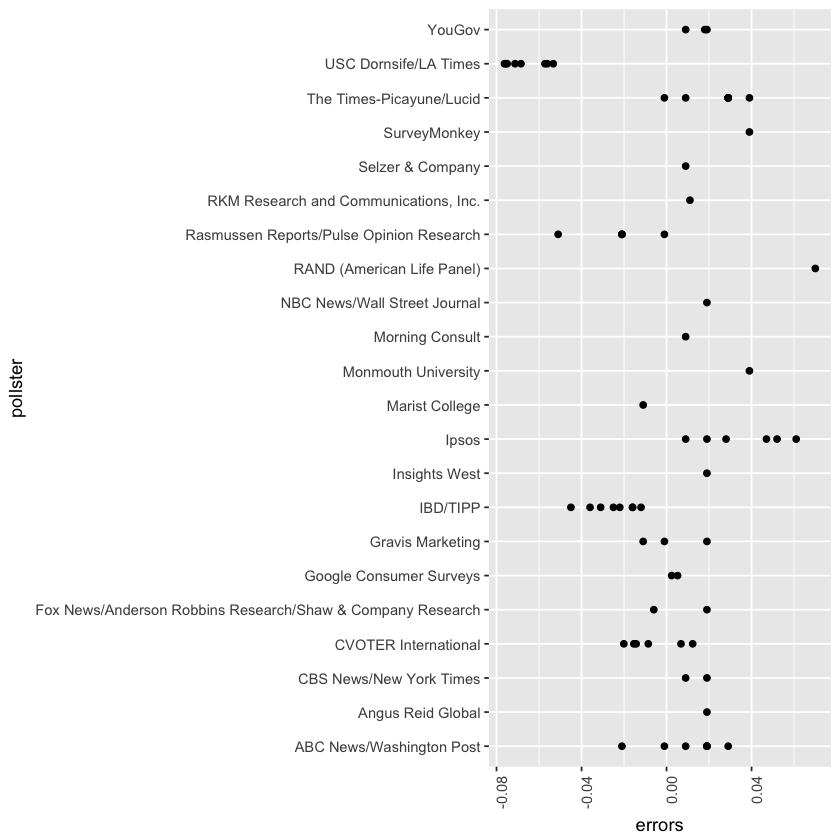

In [22]:
# The `polls` object has already been loaded. Examine it using the `head` function.
head(polls)

# Add variable called `error` to the object `polls` that contains the difference between d_hat and the actual difference on election day. Then make a plot of the error stratified by pollster.

polls <- mutate(polls, errors = d_hat - 0.021)


polls %>% ggplot(aes(x = errors, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Exercise 9. Comparing to actual results by pollster - multiple polls

Remake the plot you made for the previous exercise, but only for pollsters that took five or more polls.

You can use dplyr tools `group_by` and `n` to group data by a variable of interest and then count the number of observations in the groups. The function `filter` filters data piped into it by your specified condition.

For example:

```R
data %>% group_by(variable_for_grouping) 
    %>% filter(n() >= 5)
```

* Define a new variable `errors` that contains the difference between the estimated difference between the proportion of voters and the actual difference on election day, 0.021.
* Group the data by pollster using the `group_by` function.
* Filter the data by pollsters with 5 or more polls.
* Use `ggplot` to create the plot of errors by pollster.
* Add a layer with the function `geom_point`.

In [23]:
# The `polls` object has already been loaded. Examine it using the `head` function.
head(polls)

# Add variable called `error` to the object `polls` that contains the difference between d_hat and the actual difference on election day. Then make a plot of the error stratified by pollster, but only for pollsters who took 5 or more polls.

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,⋯,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,X_hat,se_hat,lower,upper,errors
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,⋯,45.20163,41.72430,4.626221,NA,0.0400,0.5200,0.021206832,-0.001564627,0.08156463,0.0190
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,⋯,43.34557,41.21439,5.175792,NA,0.0234,0.5117,0.006132712,0.011380104,0.03541990,0.0024
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,⋯,42.02638,38.81620,6.844734,NA,0.0300,0.5150,0.021334733,-0.011815309,0.07181531,0.0090
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,⋯,45.65676,40.92004,6.069454,NA,0.0400,0.5200,0.016478037,0.007703641,0.07229636,0.0190
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,⋯,46.84089,42.33184,3.726098,NA,0.0400,0.5200,0.007746199,0.024817728,0.05518227,0.0190
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,⋯,49.02208,43.95631,3.057876,NA,0.0400,0.5200,0.027766261,-0.014420872,0.09442087,0.0190


state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,⋯,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,X_hat,se_hat,lower,upper,errors
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,⋯,45.20163,41.72430,4.626221,NA,0.0400,0.5200,0.021206832,-0.001564627,0.08156463,0.0190
U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,⋯,43.34557,41.21439,5.175792,NA,0.0234,0.5117,0.006132712,0.011380104,0.03541990,0.0024
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,⋯,42.02638,38.81620,6.844734,NA,0.0300,0.5150,0.021334733,-0.011815309,0.07181531,0.0090
U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,⋯,45.65676,40.92004,6.069454,NA,0.0400,0.5200,0.016478037,0.007703641,0.07229636,0.0190
U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,⋯,46.84089,42.33184,3.726098,NA,0.0400,0.5200,0.007746199,0.024817728,0.05518227,0.0190
U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,⋯,49.02208,43.95631,3.057876,NA,0.0400,0.5200,0.027766261,-0.014420872,0.09442087,0.0190


state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,⋯,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat,X_hat,se_hat,lower,upper,errors
U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.0,⋯,45.20163,41.72430,4.626221,NA,0.0400,0.52000,0.02120683,-0.001564627,0.0815646272,0.0190
U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.0,⋯,42.02638,38.81620,6.844734,NA,0.0300,0.51500,0.02133473,-0.011815309,0.0718153088,0.0090
U.S.,2016-11-04,2016-11-07,IBD/TIPP,A-,1107,lv,41.20,42.70,7.1,⋯,42.92745,42.23545,6.316175,NA,-0.0150,0.49250,0.03005227,-0.073901373,0.0439013728,-0.0360
U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45.00,40.00,5.0,⋯,45.13966,42.26495,3.679914,NA,0.0500,0.52500,0.01989161,0.011013152,0.0889868476,0.0290
U.S.,2016-11-01,2016-11-07,USC Dornsife/LA Times,NA,2972,lv,43.61,46.84,NA,⋯,45.32156,43.38579,NA,NA,-0.0323,0.48385,0.01833365,-0.068233293,0.0036332933,-0.0533
U.S.,2016-10-31,2016-11-06,CVOTER International,C+,1625,lv,48.91,46.13,NA,⋯,47.01806,42.04561,NA,NA,0.0278,0.51390,0.02479736,-0.020801931,0.0764019309,0.0068
U.S.,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,45.00,43.00,4.0,⋯,45.56041,43.13745,4.418502,NA,0.0200,0.51000,0.02581472,-0.030595930,0.0705959303,-0.0010
U.S.,2016-11-02,2016-11-05,ABC News/Washington Post,A+,1937,lv,47.00,43.00,4.0,⋯,45.28374,41.76419,4.635295,NA,0.0400,0.52000,0.02270322,-0.004497495,0.0844974954,0.0190
U.S.,2016-10-31,2016-11-04,Ipsos,A-,2244,lv,43.00,39.00,6.0,⋯,43.12950,38.96855,6.757478,NA,0.0400,0.52000,0.02109312,-0.001341759,0.0813417590,0.0190
U.S.,2016-11-01,2016-11-04,ABC News/Washington Post,A+,1685,lv,48.00,43.00,4.0,⋯,46.34620,41.81491,4.620226,NA,0.0500,0.52500,0.02433081,0.002312496,0.0976875039,0.0290


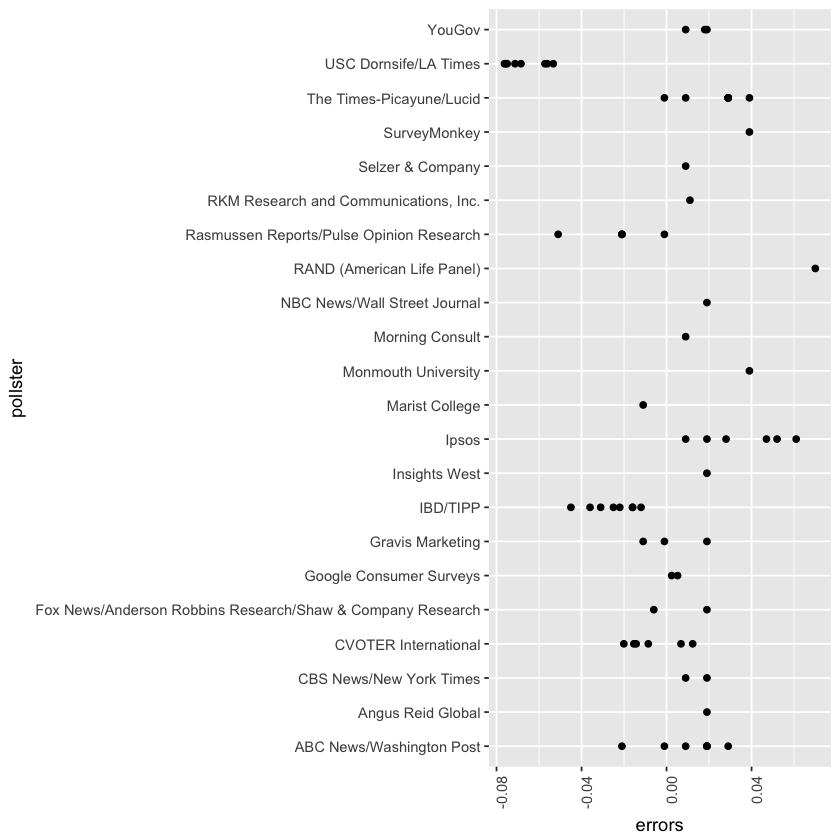

In [24]:
# The `polls` object has already been loaded. Examine it using the `head` function.
head(polls)

# Add variable called `error` to the object `polls` that contains the difference between d_hat and the actual difference on election day. Then make a plot of the error stratified by pollster, but only for pollsters who took 5 or more polls.

polls <- mutate(polls, errors = d_hat - 0.021)

polls %>% group_by(pollster) %>% filter(n() >= 5)

polls %>% ggplot(aes(x = errors, y = pollster)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

## Statistical Models

In [32]:
nrow(polls_us_election_2016)
ncol(polls_us_election_2016)
names(polls_us_election_2016)

[1] 4208

[1] 15

[1] "state"            "startdate"        "enddate"          "pollster"        
 [5] "grade"            "samplesize"       "population"       "rawpoll_clinton" 
 [9] "rawpoll_trump"    "rawpoll_johnson"  "rawpoll_mcmullin" "adjpoll_clinton" 
[13] "adjpoll_trump"    "adjpoll_johnson"  "adjpoll_mcmullin"

In [47]:
d <- 0.039
Ns <- c(1298, 533, 1342, 897, 774, 254, 
        812, 324, 1291, 1056, 2172, 516)
p <- (d + 1)/2

confidence_intervals <- sapply(Ns, function(N) {
  X <- sample(c(0,1), size=N, replace=TRUE, prob=c(1-p, p))
  X_hat <- mean(X)
  SE_hat <- sqrt(X_hat*(1-X_hat)/N)
  2*c(X_hat, X_hat - 2*SE_hat, X_hat + 2*SE_hat)-1
})

In [48]:
polls <- data.frame(poll=1:ncol(confidence_intervals), 
                  t(confidence_intervals), 
                  sample_size=Ns) %>%
  setNames(c("poll", "estimate", "low", "high", "sample_size"))
polls

poll,estimate,low,high,sample_size
1,0.066255778,0.0108650197,0.12164654,1298
2,0.106941839,0.0208090190,0.19307466,533
3,-0.002980626,-0.0575754925,0.05161424,1342
4,0.010033445,-0.0567412502,0.07680814,897
5,0.002583979,-0.0693042961,0.07447225,774
6,0.086614173,-0.0384053834,0.21163373,254
7,0.068965517,-0.0010536131,0.13898465,812
8,-0.030864198,-0.1419223739,0.08019398,324
9,0.054996127,-0.0005826647,0.11057492,1291
10,0.041666667,-0.0198256305,0.10315896,1056


In [64]:
sum(polls$sample_size)

[1] 11269

In [65]:
polls <- polls_us_election_2016 %>% 
    filter(state == 'U.S.' & enddate >= '2016-10-31' &
            (grade %in% c("A+","A","A-", "B+") | is.na(grade))) 

In [67]:
# Spread estimate
polls <- polls %>%
    mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100)

In [77]:
# p = proportion voting for Clinton
# 1 - p = proportion voting for Trump

# The spread = (p - (1 - p)) = p - 1 + p = 2p - 1

#number of estimates 
nrow(polls)

#estimated spread
d_hat <- polls %>% summarize(d_hat = sum(spread * samplesize)/sum(samplesize)) %>%
    .$d_hat
d_hat

# if we know the spread d_hat then we can get p since d = 2p - 1 then
# p = (d+1)/2
p_hat = (d_hat+1)/2
p_hat

# Standard error = sqrt(p*(1-p)/N)
# margin of error
moe <- 1.96 * 2 * sqrt(p_hat*(1-p_hat)/sum(polls$samplesize))
moe

print('we report a spread of 1.43% and margin of error of 0.66%')

[1] 49

[1] 0.01426264

[1] 0.5071313

[1] 0.006623178

[1] "we report a spread of 1.43% and margin of error of 0.66%"


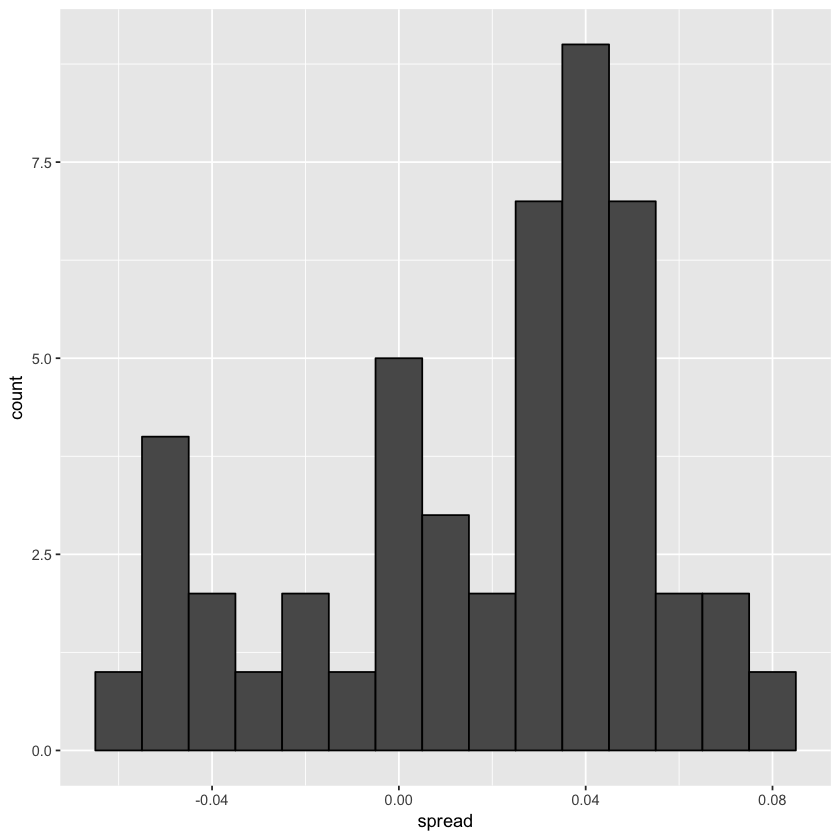

In [80]:
 polls %>%
    ggplot(aes(spread)) +
    geom_histogram(color='black', binwidth = 0.01)

In [83]:
polls %>% group_by(pollster) %>% summarize(n())

pollster,n()
ABC News/Washington Post,7
Angus Reid Global,1
CBS News/New York Times,2
Fox News/Anderson Robbins Research/Shaw & Company Research,2
IBD/TIPP,8
Insights West,1
Ipsos,6
Marist College,1
Monmouth University,1
Morning Consult,1


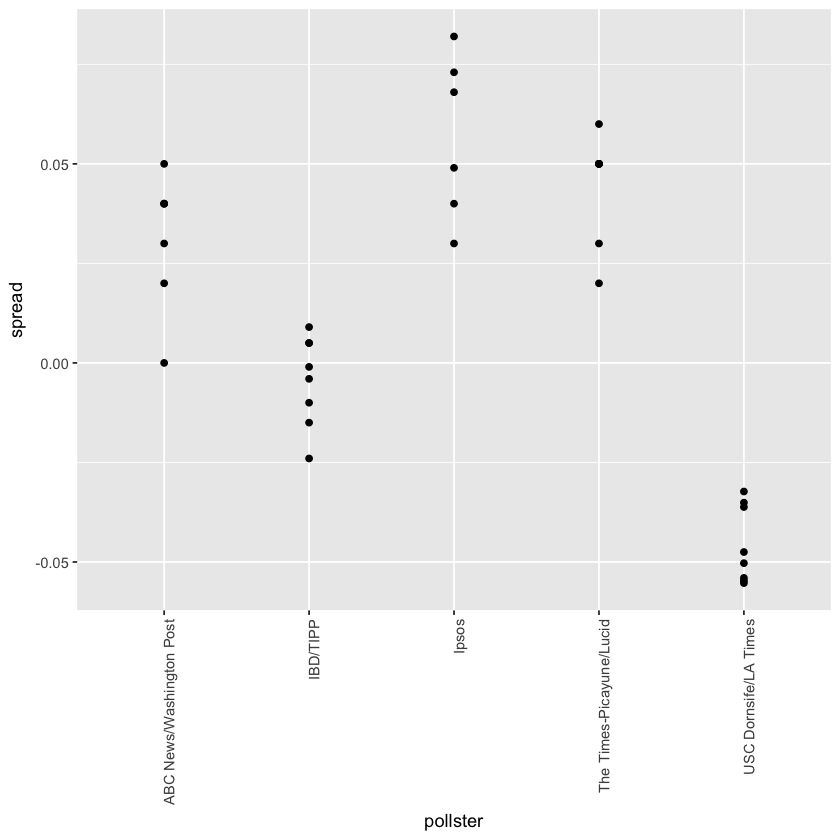

In [87]:
polls %>% group_by(pollster) %>%
    filter(n() >= 6) %>%
    ggplot(aes(pollster, spread)) + 
    geom_point() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [89]:
#  consider that the standard error predicted by theory for each poll
polls %>% group_by(pollster) %>% 
  filter(n() >= 6) %>%
  summarize(se = 2 * sqrt( p_hat * (1-p_hat) / median(samplesize)))

pollster,se
ABC News/Washington Post,0.02654389
IBD/TIPP,0.03332069
Ipsos,0.02251943
The Times-Picayune/Lucid,0.01963986
USC Dornsife/LA Times,0.01831826


### Data Driven Model

In [92]:
one_poll_per_pollster <- polls %>% group_by(pollster) %>% 
  filter(enddate == max(enddate)) %>%
    ungroup()

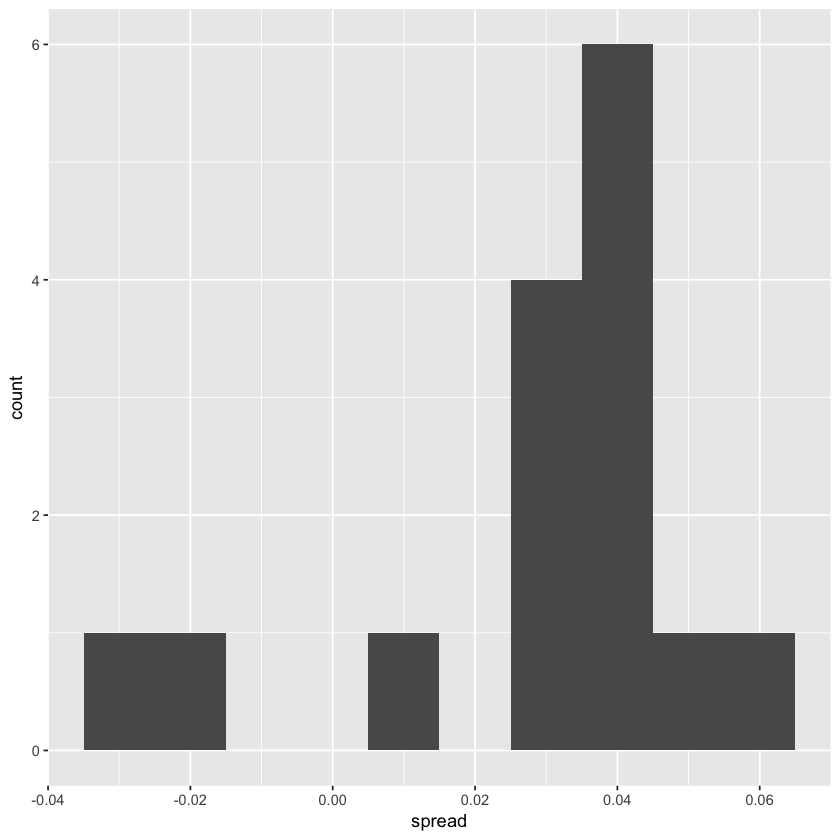

In [94]:
one_poll_per_pollster %>%
  ggplot(aes(spread)) + 
  geom_histogram(binwidth = 0.01)

In [95]:
sd(one_poll_per_pollster$spread)

[1] 0.02419369

### Exercise 1 - Heights Revisited

We have been using urn models to motivate the use of probability models. However, most data science applications are not related to data obtained from urns. More common are data that come from individuals. Probability plays a role because the data come from a random sample. The random sample is taken from a population and the urn serves as an analogy for the population.

Let's revisit the heights dataset. For now, consider `x` to be the heights of all males in the data set. Mathematically speaking, `x` is our population. Using the urn analogy, we have an urn with the values of `x` in it.

What are the population average and standard deviation of our population?

* Execute the lines of code that create a vector `x` that contains heights for all males in the population.
* Calculate the average of `x`.
* Calculate the standard deviation of `x`.


In [99]:
# Load the 'dslabs' package and data contained in 'heights'
library(dslabs)
data(heights)

# Make a vector of heights from all males in the population
x <- heights %>% filter(sex == "Male") %>%
  .$height

# Calculate the population average. Print this value to the console.
mean(x)

# Calculate the population standard deviation. Print this value to the console.
sd(x)

[1] 69.31475

[1] 3.611024

### Exercise 2 - Sample the population of heights

Call the population average computed above μ and the standard deviation σ. Now take a sample of size 50, with replacement, and construct an estimate for μ and σ.

* Use the `sample` function to sample `N` values from `x`.
* Calculate the mean of the sampled heights.
* Calculate the standard deviation of the sampled heights.

In [106]:
 # The vector of all male heights in our population `x` has already been loaded for you. You can examine the first six elements using `head`.
head(x)

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `N` as the number of people measured
N <- 50

# Define `X` as a random sample from our population `x`

X <- sample(x, N, replace = TRUE)

# Calculate the sample average. Print this value to the console.
mean(X)

# Calculate the sample standard deviation. Print this value to the console.
sd(X)

[1] 75 70 68 74 61 67

[1] 68.73423

[1] 3.761344

### Exercise 3 - Sample and Population Averages

What does the central limit theory tell us about the sample average and how it is related to μ, the population average?

A: It is a random variable with expected value μ
and standard error $\frac{\sigma}{\sqrt{N}}$

### Exercise 4 - Confidence Interval Calculation

We will use $\bar{X}$ as our estimate of the heights in the population from our sample size $N$. We know from previous exercises that the standard estimate of our error $\bar{X} - \mu$ is $\frac{\sigma}{\sqrt{N}}$

Construct a 95% confidence interval for $\mu$.

* Use the `sd` and `sqrt` functions to define the standard error `se`
* Calculate the 95% confidence intervals using the `qnorm` function. Save the lower then the upper confidence interval to a variable called `ci`.

In [110]:
# The vector of all male heights in our population `x` has already been loaded for you. You can examine the first six elements using `head`.
head(x)

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `N` as the number of people measured
N <- 50

# Define `X` as a random sample from our population `x`
X <- sample(x, N, replace = TRUE)

# Define `se` as the standard error of the estimate. Print this value to the console.

se <- sd(X)/sqrt(N)
se
# Construct a 95% confidence interval for the population average based on our sample. Save the lower and then the upper confidence interval to a variable called `ci`.
ci <- c(mean(X) - (qnorm(0.975)*se), mean(X) + (qnorm(0.975)*se))
ci

[1] 75 70 68 74 61 67

[1] 0.5319343

[1] 67.69166 69.77681

### Exercise 5 - Monte Carlo Simulation for Heights

Now run a Monte Carlo simulation in which you compute 10,000 confidence intervals as you have just done. What proportion of these intervals include $\mu$?

* Use the `replicate` function to replicate the sample code for `B <- 10000` simulations. Save the results of the replicated code to a variable called `res`. The replicated code should complete the following steps: -1. Use the `sample` function to sample `N` values from `x`. Save the sampled heights as a vector called `X`. -2. Create an object called interval that contains the 95% confidence `interval` for each of the samples. Use the same formula you used in the previous exercise to calculate this interval. -3. Use the `between` function to determine if $\mu$ is contained within the confidence interval of that simulation.
* Finally, use the `mean` function to determine the proportion of results in `res` that contain mu.

In [115]:
# Define `mu` as the population average
mu <- mean(x)

# Use the `set.seed` function to make sure your answer matches the expected result after random sampling
set.seed(1)

# Define `N` as the number of people measured
N <- 50

# Define `B` as the number of times to run the model
B <- 10000

# Define an object `res` that contains a logical vector for simulated intervals that contain mu

res <- replicate(B, {
  X <- sample(x, N, replace = TRUE)
  se <- sd(X)/sqrt(N)
  interval <- c(mean(X) - (qnorm(0.975)*se), mean(X) + (qnorm(0.975)*se))
  between(mu, interval[1], interval[2])

})

# Calculate the proportion of results in `res` that include mu. Print this value to the console.

mean(res)

[1] 0.9433

### Exercise 6 - Visualizing Polling Bias

In this section, we used visualization to motivate the presence of pollster bias in election polls. Here we will examine that bias more rigorously. Lets consider two pollsters that conducted daily polls and look at national polls for the month before the election.

Is there a poll bias? Make a plot of the spreads for each poll.

* Use `ggplot` to plot the spread for each of the two pollsters.
* Define the x- and y-axes usingusing `aes()` within the `ggplot` function.
* Use `geom_boxplot` to make a boxplot of the data.
* Use `geom_point` to add data points to the plot.

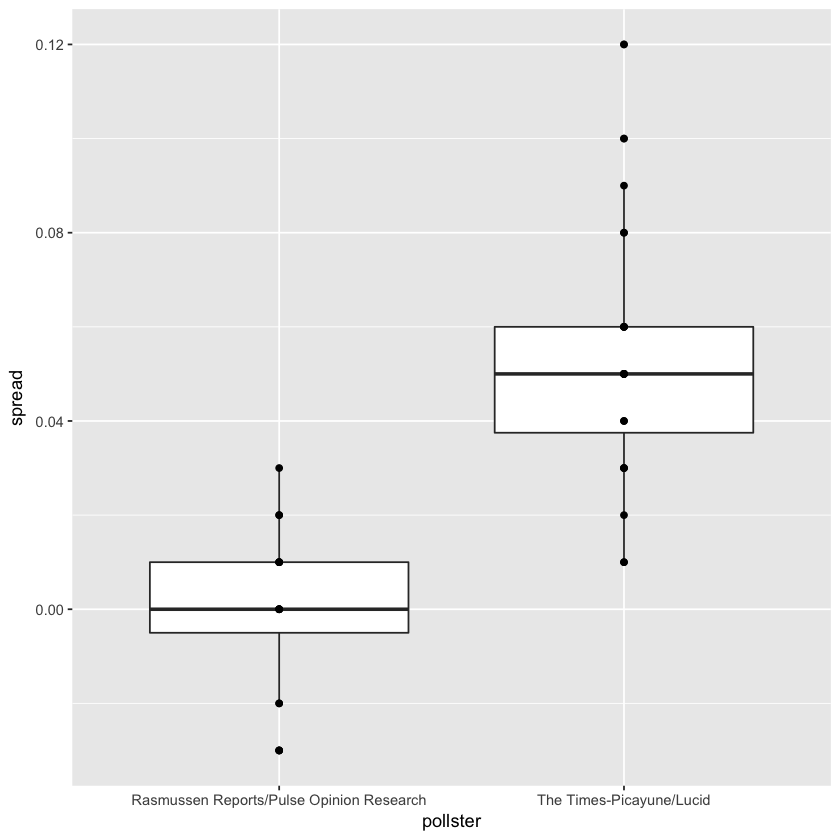

In [117]:
# Load the libraries and data you need for the following exercises
library(dslabs)
library(dplyr)
library(ggplot2)
data("polls_us_election_2016")

# These lines of code filter for the polls we want and calculate the spreads
polls <- polls_us_election_2016 %>% 
  filter(pollster %in% c("Rasmussen Reports/Pulse Opinion Research","The Times-Picayune/Lucid") &
           enddate >= "2016-10-15" &
           state == "U.S.") %>% 
  mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100) 

# Make a boxplot with points of the spread for each pollster
polls %>% 
    ggplot(aes(pollster, spread)) + 
    geom_boxplot() +
    geom_point()

### Exercise 7 - Defining Pollster Bias

The data do seem to suggest there is a difference between the pollsters. However, these data are subject to variability. Perhaps the differences we observe are due to chance. Under the urn model, both pollsters should have the same expected value: the election day difference, d. 

We will model the observed data $Y_{ij}$ in the following way:

$Y_{ij}$ =$d+bi+\epsilon_{ij}$

with i=1,2 indexing the two pollsters, $b_i$ the bias for pollster i
$i$, and $\epsilon_{ij}$ poll to poll chance variability. We assume the $\epsilon$ are independent from each other, have expected value 0
0 and standard deviation $\sigma_i$ regardless of $j$.

Which of the following statements best reflects what we need to know to determine if our data fit the urn model?

** A:  is $b_1 \neq b_2$ **

### Exercise 8 - Derive Expected Value

We modelled the observed data $Y_{ij}$ as:

$Y_{ij}=d+b_i+\epsilon_{ij}$

On the right side of this model, only $\epsilon_{ij}$ is a random variable. The other two values are constants.

What is the expected value of $Y_{ij}$?

** A: $d + b_1$ **

### Exercise 9 - Expected Value and Standard Error of Poll 1

Suppose we define $\bar{Y}_1$ as the average of poll results from the first poll and $\sigma_1$ as the standard deviation of the first poll.

What is the expected value and standard error of $\bar{Y}_1$?

** A: The expected value is $d+b_1$ and the standard error is $\frac{\sigma_1}{\sqrt{N_1}}$ **

### Exercise 10 - Expected Value and Standard Error of Poll 2

Now we define $\bar{Y}_2$ as the average of poll results from the second poll.

What is the expected value and standard error of  $\bar{Y}_2$?

** A: The expected value is $d+b_2$ and the standard error is $\frac{\sigma_2}{\sqrt{N_2}}$ **

### Exercise 11 - Difference in Expected Values Between Polls

Using what we learned by answering the previous questions, what is the expected value of $\bar{Y}_2 - \bar{Y}_1$?

** A: $b_2 - b_1$ **

### Exercise 12 - Standard Error of the Difference Between Polls

Using what we learned by answering the questions above, what is the standard error of $\bar{Y}_2 - \bar{Y}_1$?

** A: $\sqrt{\frac{\sigma^{2}_2}{N_2} + \frac{\sigma^{2}_1}{N_1}}$**

### Exercise 13 - Compute the Estimates

The answer to the previous question depends on $\sigma_1$ and $\sigma_2$, which we don't know. We learned that we can estimate these values using the sample standard deviation.

Compute the estimates of $\sigma_1$ and $\sigma_2$.


* Group the data by pollster.
* Summarize the standard deviation of the spreads for each of the two pollsters.
* Store the pollster names and standard deviations of the spreads ($
\sigma$) in an object called `sigma`

In [130]:
# The `polls` data have already been loaded for you. Use the `head` function to examine them.
head(polls)

# Create an object called `sigma` that contains a column for `pollster` and a column for `s`, the standard deviation of the spread

sigma <- polls %>% group_by(pollster) %>% summarize(s = sd(spread))


# Print the contents of sigma to the console
sigma

state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05
U.S.,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,45,43,4,NA,45.56041,43.13745,4.418502,NA,0.02
U.S.,2016-11-01,2016-11-03,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,44,44,4,NA,44.66353,44.28981,4.331246,NA,0.00
U.S.,2016-11-04,2016-11-06,The Times-Picayune/Lucid,NA,2584,lv,45,40,5,NA,45.22830,42.30433,3.770880,NA,0.05
U.S.,2016-10-31,2016-11-02,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,42,45,4,NA,42.67626,45.41689,4.239500,NA,-0.03
U.S.,2016-11-03,2016-11-05,The Times-Picayune/Lucid,NA,2526,lv,45,40,5,NA,45.31041,42.34422,3.779955,NA,0.05


pollster,s
Rasmussen Reports/Pulse Opinion Research,0.01768945
The Times-Picayune/Lucid,0.02678078


### Exercise 14 - Probability Distribution of the Spread

What does the central limit theorem tell us about the distribution of the differences between the pollster averages, $\bar{Y}_2 - \bar{Y}_1$?

** A: If we assume $N_2$ and $N_1$ are large enough, $\bar{Y}_2$ and $\bar{Y}_2$, and their difference, are approximately normal. ** 

### Exercise 15 - Calculate the 95% Confidence Interval of the Spreads

We have constructed a random variable that has expected value $b_2−b_1$, the pollster bias difference. If our model holds, then this random variable has an approximately normal distribution. The standard error of this random variable depends on $\sigma_1$ and $\sigma_2$, but we can use the sample standard deviations we computed earlier. We have everything we need to answer our initial question: is $b_2−b_1$ different from 0?

Construct a 95% confidence interval for the difference $b_2$ and $b_1$. Does this interval contain zero?


* Use pipes `%>%` to pass the data `polls` on to functions that will group by pollster and summarize the average spread, standard deviation, and number of polls per pollster.
* Calculate the estimate by subtracting the average spreads.
* Calculate the standard error using the standard deviations of the spreads and the sample size.
* Calculate the 95% confidence intervals using the `qnorm` function. Save the lower and then the upper confidence interval to a variable called `ci`.

In [150]:
# The `polls` data have already been loaded for you. Use the `head` function to examine them.
head(polls)

# Create an object called `res` that summarizes the average, standard deviation, and number of polls for the two pollsters.

res <- polls %>% group_by(pollster) %>% summarize(avg = mean(spread), s = sd(spread), n=n())
res

# Store the difference between the larger average and the smaller in a variable called `estimate`. Print this value to the console.
estimate <- res$avg[2] - res$avg[1]
estimate


# Store the standard error of the estimates as a variable called `se_hat`. Print this value to the console.
res <- data.frame(res)
se_hat <- sqrt((res$s[2]^2/res$n[2]) + (res$s[1]^2/res$n[1]) )
se_hat


# Calculate the 95% confidence interval of the spreads. Save the lower and then the upper confidence interval to a variable called `ci`.
ci <- c(estimate - (qnorm(0.975)*se_hat), estimate + (qnorm(0.975)*se_hat))
ci


state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,spread
U.S.,2016-11-05,2016-11-07,The Times-Picayune/Lucid,NA,2521,lv,45,40,5,NA,45.13966,42.26495,3.679914,NA,0.05
U.S.,2016-11-02,2016-11-06,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,45,43,4,NA,45.56041,43.13745,4.418502,NA,0.02
U.S.,2016-11-01,2016-11-03,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,44,44,4,NA,44.66353,44.28981,4.331246,NA,0.00
U.S.,2016-11-04,2016-11-06,The Times-Picayune/Lucid,NA,2584,lv,45,40,5,NA,45.22830,42.30433,3.770880,NA,0.05
U.S.,2016-10-31,2016-11-02,Rasmussen Reports/Pulse Opinion Research,C+,1500,lv,42,45,4,NA,42.67626,45.41689,4.239500,NA,-0.03
U.S.,2016-11-03,2016-11-05,The Times-Picayune/Lucid,NA,2526,lv,45,40,5,NA,45.31041,42.34422,3.779955,NA,0.05


pollster,avg,s,n
Rasmussen Reports/Pulse Opinion Research,0.00062500,0.01768945,16
The Times-Picayune/Lucid,0.05291667,0.02678078,24


[1] 0.05229167

[1] 0.007031433

[1] 0.03851031 0.06607302

### Exercise 16 - Calculate the P-value

The confidence interval tells us there is relatively strong pollster effect resulting in a difference of about 5%. Random variability does not seem to explain it.

Compute a p-value to relay the fact that chance does not explain the observed pollster effect.

* Use the `pnorm` function to calculate the probability that a random value is larger than the observed ratio of the estimate to the standard error.
* Multiply the probability by 2, because this is the two-tailed test.

In [152]:
# We made an object `res` to summarize the average, standard deviation, and number of polls for the two pollsters.
res <- polls %>% group_by(pollster) %>% 
  summarize(avg = mean(spread), s = sd(spread), N = n()) 

# The variables `estimate` and `se_hat` contain the spread estimates and standard error, respectively.
estimate <- res$avg[2] - res$avg[1]
se_hat <- sqrt(res$s[2]^2/res$N[2] + res$s[1]^2/res$N[1])

# Calculate the p-value
(1-(pnorm(estimate/se_hat) - pnorm(-estimate/se_hat)))


[1] 1.030287e-13

### Exercise 17 - Comparing Within-Poll and Between-Poll Variability

We compute statistic called the t-statistic by dividing our estimate of $b2−b1$ by its estimated standard error:

### $\frac{\bar{Y}_2-\bar{Y}_1}{\sqrt{\frac{s^2_2}{N_2}+\frac{s^2_1}{N_1}}}$

Later we learn will learn of another approximation for the distribution of this statistic for values of $N_2$ and $N_1$
 that aren't large enough for the CLT.

Note that our data has more than two pollsters. We can also test for pollster effect using all pollsters, not just two. The idea is to compare the variability across polls to variability within polls. We can construct statistics to test for effects and approximate their distribution. The area of statistics that does this is called Analysis of Variance or ANOVA. We do not cover it here, but ANOVA provides a very useful set of tools to answer questions such as: is there a pollster effect?

Compute the average and standard deviation for each pollster and examine the variability across the averages and how it compares to the variability within the pollsters, summarized by the standard deviation.

* Group the `polls` data by pollster.
* Summarize the average and standard deviation of the spreads for each pollster.
* Create an object called `var` that contains three columns: pollster, mean spread, and standard deviation.
* Be sure to name the column for mean `avg` and the column for standard deviation `s`.

In [154]:
# Execute the following lines of code to filter the polling data and calculate the spread
polls <- polls_us_election_2016 %>% 
  filter(enddate >= "2016-10-15" &
           state == "U.S.") %>%
  group_by(pollster) %>%
  filter(n() >= 5) %>% 
  mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100) %>%
  ungroup()

# Create an object called `var` that contains columns for the pollster, mean spread, and standard deviation. Print the contents of this object to the console.

var <- polls %>% group_by(pollster) %>% summarize(avg = mean(spread), s= sd(spread))
var


pollster,avg,s
ABC News/Washington Post,0.037333333,0.033904628
CVOTER International,0.027895455,0.017975499
Google Consumer Surveys,0.030280000,0.018476390
Gravis Marketing,0.016000000,0.015165751
IBD/TIPP,0.001047619,0.016832933
Ipsos,0.055272727,0.019464698
Morning Consult,0.041428571,0.014638501
Rasmussen Reports/Pulse Opinion Research,0.000625000,0.017689451
The Times-Picayune/Lucid,0.052916667,0.026780779
USC Dornsife/LA Times,-0.021320833,0.020661474


## Bayesian Statistics

## Exercises

### Exercise 1 - Confidence Intervals of Polling Data

For each poll in the polling data set, use the CLT to create a 95% confidence interval for the spread. Create a new table called `cis` that contains columns for the lower and upper limits of the confidence intervals.

* Use pipes `%>%` to pass the `poll` object on to the `mutate` function, which creates new variables.
* Create a variable called `X_hat` that contains the estimate of the proportion of Clinton voters for each poll.
* Create a variable called `se` that contains the standard error of the spread.
* Calculate the confidence intervals using the `qnorm` function and your calculated `se`.
* Use the select function to keep the following columns: `state`, `startdate`, `enddate`, `pollster`, `grade`, `spread`, `lower`, `upper`.

In [54]:
# Load the libraries and data
library(dplyr)
library(dslabs)
data("polls_us_election_2016")

# Create a table called `polls` that filters by  state, date, and reports the spread
polls <- polls_us_election_2016 %>% 
  filter(state != "U.S." & enddate >= "2016-10-31") %>% 
  mutate(spread = rawpoll_clinton/100 - rawpoll_trump/100)

# Create an object called `cis` that columns for the lower and upper confidence intervals. Select the columns indicated in the instructions.

cis <- polls %>%
    mutate(X_hat = (spread+1)/2, se = 2*sqrt(X_hat*(1-X_hat))/samplesize, 
              lower = spread - qnorm(0.975)*se, 
              upper = spread + qnorm(0.975)*se) %>%
    select(state, startdate, enddate, pollster, grade, spread, lower, upper)



In [55]:
head(cis)

state,startdate,enddate,pollster,grade,spread,lower,upper
New Mexico,2016-11-06,2016-11-06,Zia Poll,NA,0.02,0.019767796,0.020232204
Virginia,2016-11-03,2016-11-04,Public Policy Polling,B+,0.05,0.048418811,0.051581189
Iowa,2016-11-01,2016-11-04,Selzer & Company,A+,-0.07,-0.072443945,-0.067556055
Wisconsin,2016-10-26,2016-10-31,Marquette University,A,0.06,0.058441089,0.061558911
North Carolina,2016-11-04,2016-11-06,Siena College,A,0.00,-0.002449955,0.002449955
Georgia,2016-11-06,2016-11-06,Landmark Communications,B,-0.03,-0.031632568,-0.028367432


In [56]:
names(polls)

[1] "state"            "startdate"        "enddate"          "pollster"        
 [5] "grade"            "samplesize"       "population"       "rawpoll_clinton" 
 [9] "rawpoll_trump"    "rawpoll_johnson"  "rawpoll_mcmullin" "adjpoll_clinton" 
[13] "adjpoll_trump"    "adjpoll_johnson"  "adjpoll_mcmullin" "spread"

In [57]:
# Add the actual results to the `cis` data set
add <- results_us_election_2016 %>% 
    mutate(actual_spread = clinton/100 - trump/100) %>% 
    select(state, actual_spread)
cis <- cis %>% mutate(state = as.character(state)) %>% 
    left_join(add, by = "state")

# Create an object called `p_hits` that summarizes the proportion of confidence intervals that contain the actual value. Print this object to the console.

p_hits <- cis %>% mutate(hits = ifelse(actual_spread >= lower & actual_spread <= upper, 1,0)) 
    %>% summarize(proportion_hits = mean(hits))

In [95]:
p_hits <- cis %>% mutate(hit = ifelse(actual_spread >= lower & actual_spread <= upper, 1, 0)) %>%
    group_by(pollster) %>%
    filter(n() >= 5) %>%
    summarize(proportion_hits = mean(hit), n = n(), grade=grade[1]) %>%
    ungroup() %>%
    arrange(desc(proportion_hits))

In [93]:
p_hits

pollster,proportion_hits,n,grade
Public Policy Polling,0.11111111,9,B+
Ipsos,0.06722689,119,A-
Rasmussen Reports/Pulse Opinion Research,0.06451613,31,C+
Google Consumer Surveys,0.02941176,102,B
SurveyMonkey,0.02240896,357,C-
Emerson College,0.00000000,11,B
Gravis Marketing,0.00000000,23,B-
Quinnipiac University,0.00000000,6,A-
Remington,0.00000000,9,NA
Trafalgar Group,0.00000000,9,C


In [99]:
p_hits <- cis %>% mutate(hit = ifelse(actual_spread >= lower & actual_spread <= upper, 1, 0)) %>%
    group_by(state) %>%
    filter(n() >= 5) %>%
    summarize(proportion_hits = mean(hit), n = n()) %>%
    ungroup() %>%
    arrange(desc(proportion_hits))

state,proportion_hits,n
Illinois,0.46153846,13
Delaware,0.25000000,12
Rhode Island,0.10000000,10
Georgia,0.09523810,21
Vermont,0.09090909,11
Colorado,0.08695652,23


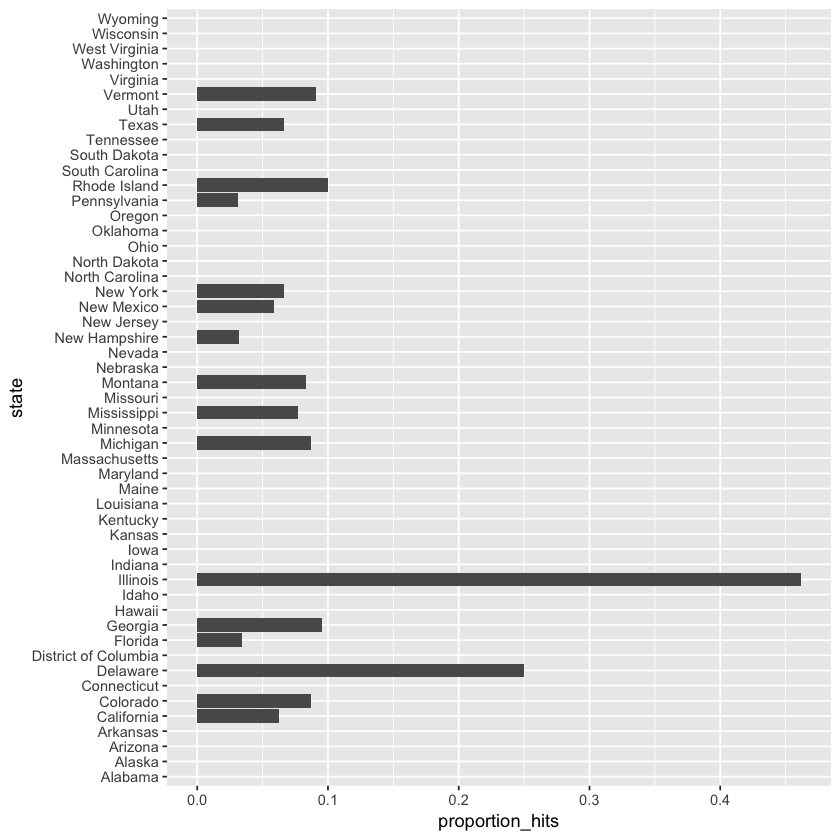

In [100]:
# The `p_hits` data have already been loaded for you. Use the `head` function to examine it.
head(p_hits)

# Make a barplot of the proportion of hits for each state

ggplot(data = p_hits, aes(state, proportion_hits)) +
geom_bar(stat = 'identity') +
coord_flip()